# Country Segmentation for Development Aid Allocation
## A Clustering Analysis of Socio-Economic and Health Factors

---

### Table of Contents
1. [Problem Statement](#problem-statement)
2. [Dataset Overview](#dataset-overview)
3. [Data Exploration and Processing](#data-exploration)
4. [K-Means Clustering: Optimal K, Implementation, and Visualization](#kmeans-clustering)
5. [Hierarchical Clustering: Implementation and Visualization](#hierarchical-clustering)
6. [Cluster Evaluation and Interpretation](#evaluation)
7. [Conclusion](#conclusion)

---

<a id="problem-statement"></a>
### 1. Problem Statement

The primary goal of this project is to categorize countries based on socio-economic and health factors to identify nations that are in the direst need of development aid, particularly for child support initiatives. By applying unsupervised clustering techniques, we aim to group countries with similar developmental profiles.

This analysis will help international organizations like the UN and NGOs to:
- Strategically and effectively allocate financial resources.
- Prioritize countries that require immediate attention and intervention.
- Understand the multi-dimensional aspects of underdevelopment by examining the characteristics of the identified clusters.

The project will involve data loading, preprocessing, exploratory data analysis, application of clustering algorithms (such as K-Means and Hierarchical Clustering), cluster profiling, and interpretation of the results to provide actionable insights.

---

<a id="dataset-overview"></a>
### 2. Dataset Overview

The dataset to be used is `Country-data.csv`, which contains various socio-economic and health indicators for a list of countries. I downloaded the dataset from Kaggle

We start with loading the dataset saved locally in the same directory

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_countries = pd.read_csv("Country-data.csv")

# Display the first few rows of the dataframe
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


*   **country:** Name of the country.
*   **child_mort:** Death of children under 5 years of age per 1000 live births. This is a key indicator of child health and overall healthcare quality.
*   **exports:** Exports of goods and services, given as a percentage of the Total GDP.
*   **health:** Total health spending as a percentage of the Total GDP. Indicates the national priority given to healthcare.
*   **imports:** Imports of goods and services, given as a percentage of the Total GDP.
*   **income:** Net income per person.
*   **inflation:** consumer price inflation
*   **life_expec:** The average number of years a newborn child would live if the current mortality patterns were to remain the same
*   **total_fer:** The number of children that would be born to each woman if the current age-fertility rates remain the same (Total Fertility Rate). 
*   **gdpp:** The GDP per capita, calculated as the Total GDP divided by the total population.

The `country` column serves as an identifier and will not be used in the clustering process itself, but rather for interpreting the results. The other nine features are numerical and will form the basis for our clustering analysis.

---

<a id="data-exploration"></a>
### 3. Data Exploration and Processing

In this section, we will perform initial exploratory steps to understand its structure, data types, and basic statistics, and check for any immediate issues like missing data.

In [2]:

print("Dataset Shape:", df_countries.shape)


Dataset Shape: (167, 10)


In [3]:
# Get a concise summary of the dataframe

df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


*   The dataset comprises 167 entries (rows) and 10 columns.
    *   The `country` column is of `object` type (strings).
    *   The features `child_mort`, `exports`, `health`, `imports`, `inflation`, `life_expec`, and `total_fer` are `float64`.
    *   The features `income` and `gdpp` are `int64`.

In [4]:
# Get descriptive statistics for numerical features
df_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


*   `child_mort` ranges from 2.6 to 208.0, with a mean of 38.27.
    *   `income` (Net income per person) ranges from 609 to 125,000, with a mean of approximately 17,145.
    *   `gdpp` (GDP per capita) ranges from 231 to 105,000, with a mean of approximately 12,964.
    *   These statistics highlight the wide variation in socio-economic and health indicators across the countries.

In [5]:
# Check for missing values and duplicates
print("Missing Values:")
print(df_countries.isnull().sum())  

print("\nDuplicate Rows:", df_countries.duplicated().sum())

Missing Values:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Duplicate Rows: 0


*   There are no missing values in the dataset nor duplicates.

---

### 3.1 Geo-visualization of Countries

To get a better sense of the geographical distribution of the countries in our dataset and how certain key indicators vary globally, we can create a world map visualization. We'll use `plotly.express` for this, which can create interactive maps.

In [6]:
# Import plotly for interactive visualizations
import plotly.express as px

# Plotly's choropleth map typically uses country names that it can recognize.
fig = px.choropleth(df_countries,
                    locations="country",
                    locationmode="country names", # Use country names directly
                    color="gdpp", # Color by GDP per capita
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Blugrn, # Color scale
                    title="Global Distribution of GDP per Capita (gdpp)",
                    height=600
                   )
fig.show()

The map above shows the global distribution of countries colored by their GDP per capita. Darker shades typically indicate higher `gdpp`, while lighter shades indicate lower `gdpp`.


### 3.2 Feature Distributions

Let's examine the distribution of each numerical feature in the dataset. This will help us understand their central tendency, spread, and skewness, and identify potential outliers or data transformations that might be needed.

We'll start with histograms.

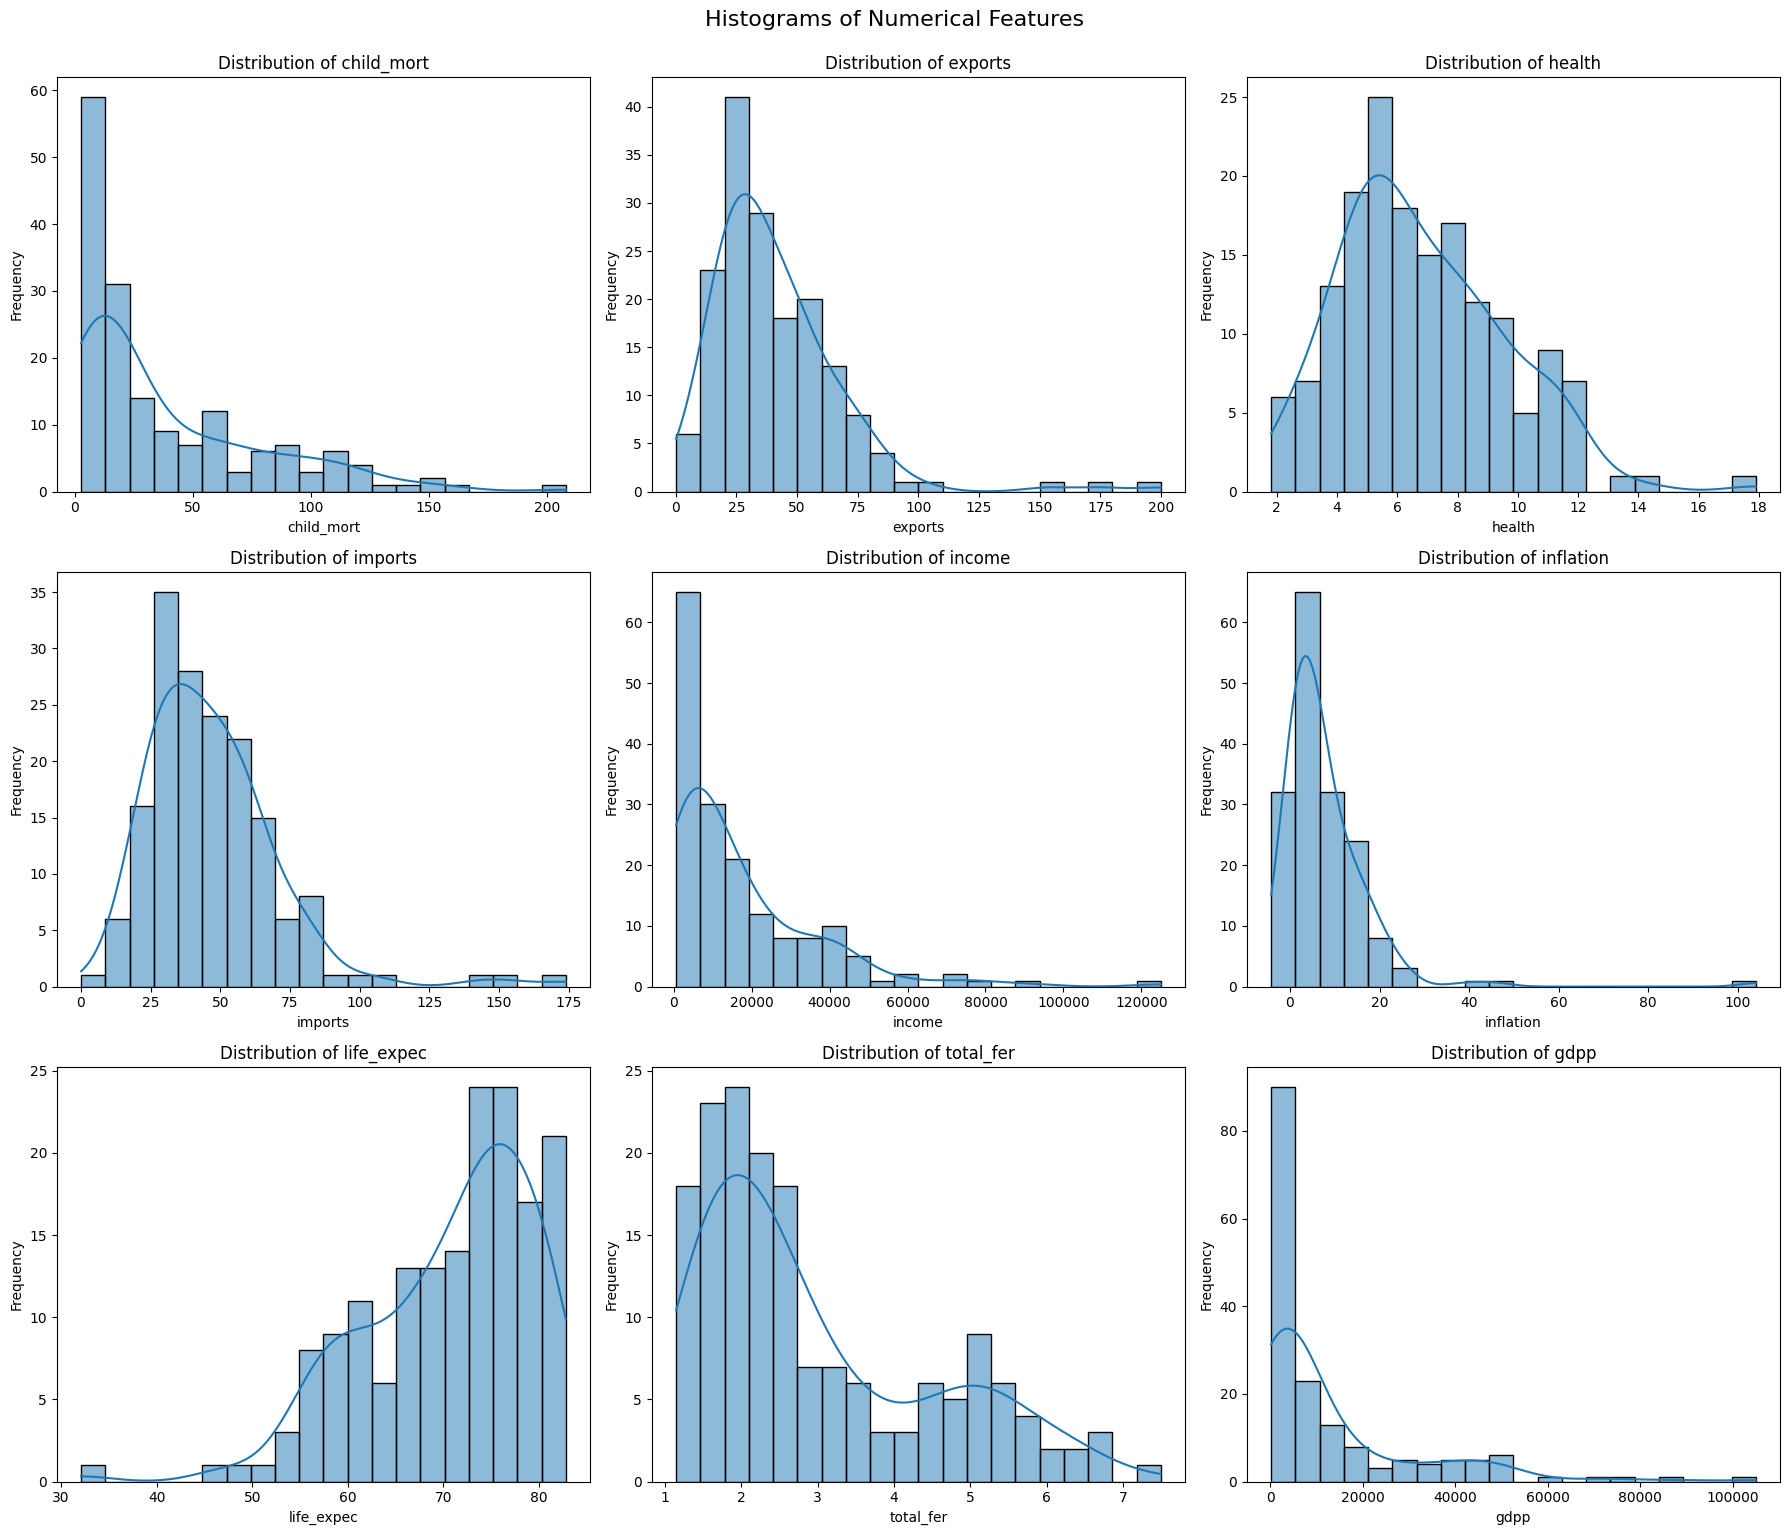

In [7]:
# Select numerical features for plotting (excluding 'country' if it's still there as an object type)
numerical_features = df_countries.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1) # Assuming 9 numerical features
    sns.histplot(df_countries[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)
plt.show()

* Most features exhibit some level of skewness. The `health` indicator appears to be the least skewed among them, showing a more symmetric distribution.
* **Right-skewed features** (most countries have lower values, with a tail of higher values):
    *   `child_mort`
    *   `exports`
    *   `imports`
    *   `income`
    *   `inflation`
    *   `total_fer`
    *   `gdpp`
* **Left-skewed features** (most countries have higher values, with a tail of lower values):
    *   `life_expec`
* Indicators like `gdpp` and `income` show high kurtosis (leptokurtic distributions). This means their distributions have sharper peaks and heavier tails compared to a normal distribution, indicating that a large number of countries have low income and GDP per capita, while a smaller number of countries have extremely high values, leading to significant outliers on the higher end.


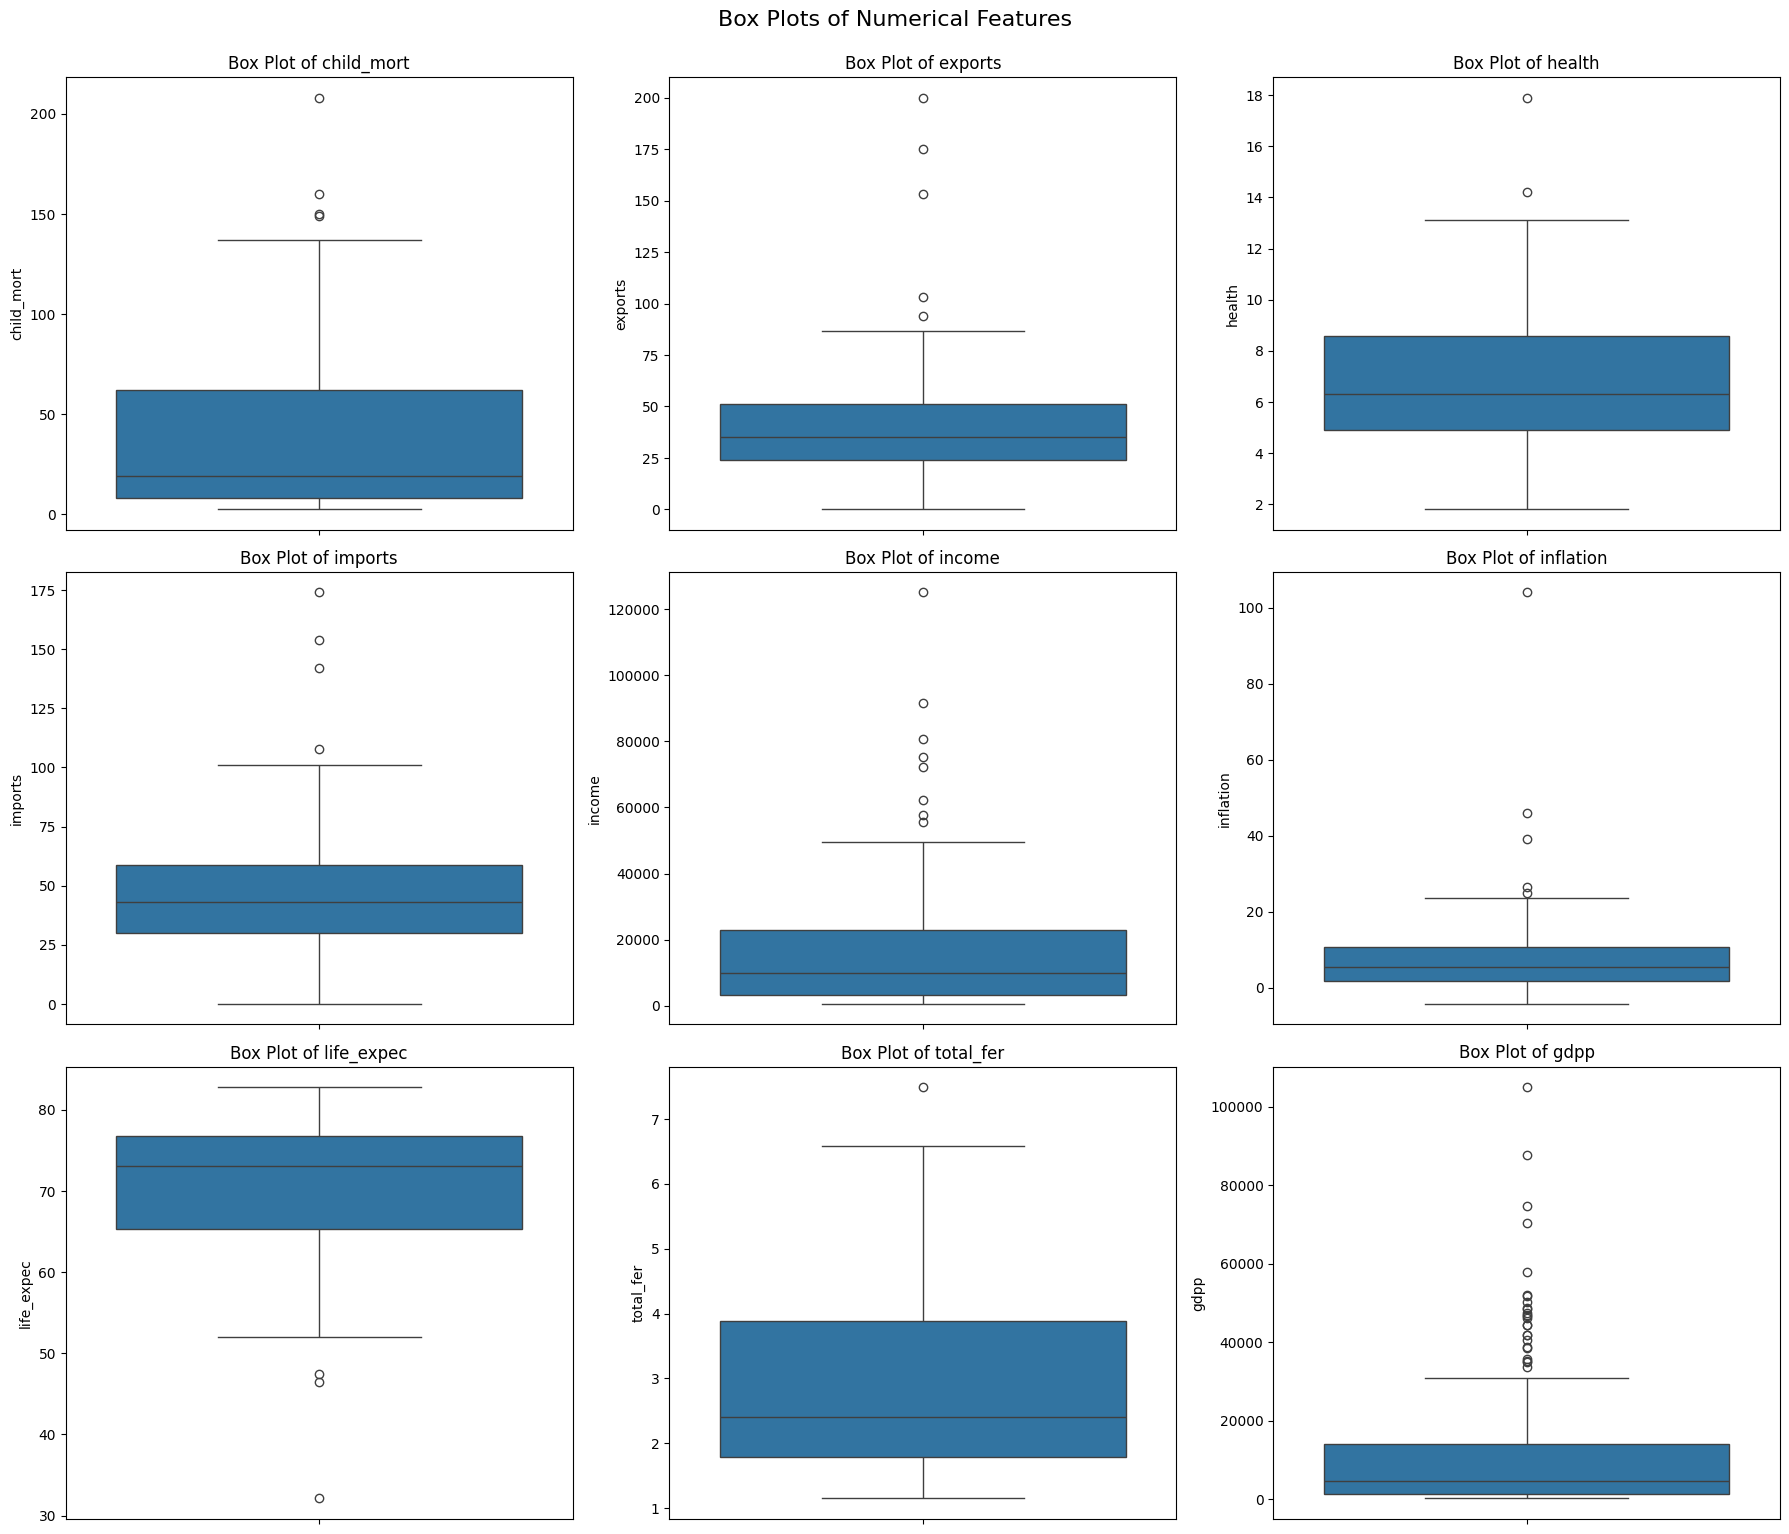

In [8]:
# Box plots for each numerical feature to identify outliers
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_countries[feature])
    plt.title(f'Box Plot of {feature}', fontsize=12)
    plt.ylabel(feature, fontsize=10)
plt.tight_layout()
plt.suptitle('Box Plots of Numerical Features', fontsize=16, y=1.02)
plt.show()

The box plots reveal that several features have notable outliers, particularly on the higher end. These include:

*   `inflation`
*   `income`
*   `gdpp`



The presence of these outliers suggests that some countries have exceptionally high or low values for these indicators compared to the majority. We will address these outliers in a later data preprocessing step (Section 3.4.1 Outlier Capping) to ensure they do not disproportionately influence the clustering algorithms.

---

### 3.3 Correlation matrix

the relationships between different features. This can help us understand how various socio-economic and health indicators are correlated.


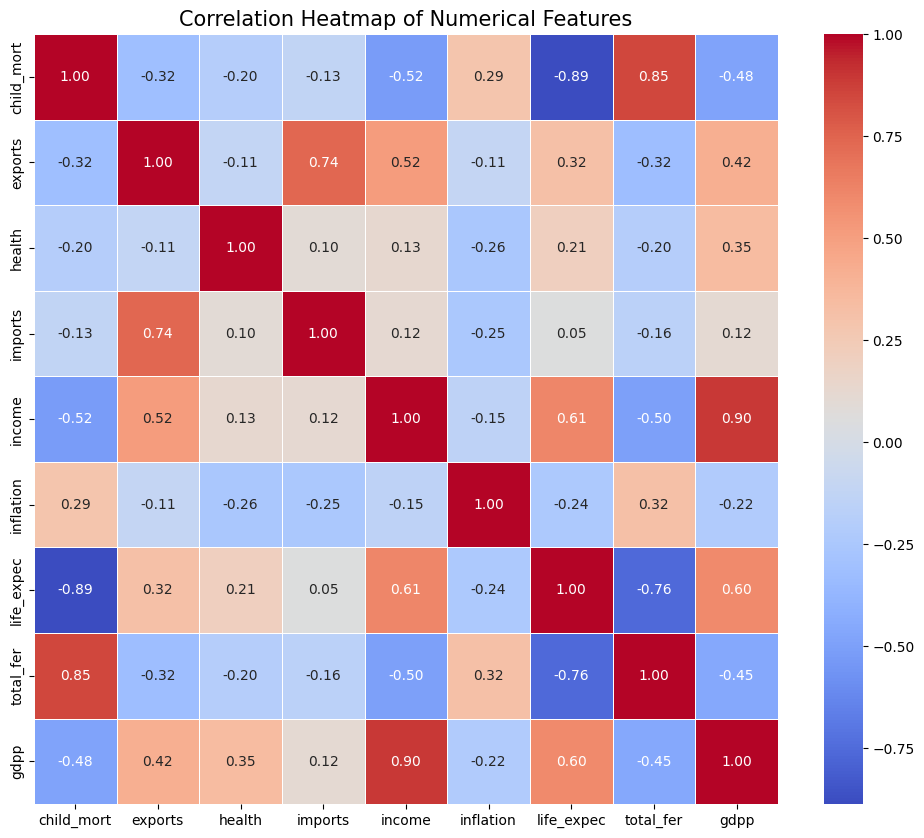

In [9]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = df_countries[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=15)
plt.show()

The heatmap shows Pearson correlation coefficients between pairs of features.
- **Strong Positive Correlations** between:
    - `income` and `gdpp` (countries with higher income per person tend to have higher GDP per capita).
    - `life_expec` and `income`/`gdpp` (wealthier countries tend to have higher life expectancy).
    - `exports` and `imports` (countries that export more often also import more, as percentages of GDP).
- **Strong Negative Correlations** observed between:
    - `child_mort` and `life_expec` (higher child mortality is associated with lower life expectancy).
    - `child_mort` and `income`/`gdpp` (poorer countries tend to have higher child mortality).
    - `total_fer` and `life_expec`/`income`/`gdpp` (higher fertility rates are often seen in less developed countries).
- **Inflation** might have complex relationships, sometimes negatively correlated with stability indicators.
---



### 3.4 Data Preprocessing

Before applying clustering algorithms, we need to preprocess the data. This typically involves:
1.  **Handling Categorical Data:** Our 'country' column is categorical. We'll keep it separate for now as it's an identifier, not a feature for clustering.
2.  **Outlier Capping:** Address extreme values in numerical features by capping them at the 1st and 99th percentiles.
3.  **Feature Scaling:** Clustering algorithms like K-Means are sensitive to the scale of features. We'll scale our numerical features (after capping) to have zero mean and unit variance using `StandardScaler`.
4.  **Dimensionality Reduction :** We will use Principal Component Analysis (PCA) to reduce the dimensionality of the data. This will help us visualize the data in 2D and can sometimes improve clustering performance by removing noise.

#### 3.4.1 Outlier Capping

To mitigate the influence of extreme outliers on the clustering algorithms, I capped the values of numerical features at their 1st and 99th percentiles. This means any value below the 1st percentile is replaced by the 1st percentile value, and any value above the 99th percentile is replaced by the 99th percentile value.


In [10]:
# Create a copy of the features dataframe for capping
df_features = df_countries[numerical_features].copy()
country_names = df_countries['country'].values
df_features_capped = df_features.copy()

# Store details of capped features and countries
capped_info = {}

print("Applying outlier capping at 1st and 99th percentiles:\n")
for col in numerical_features:
    lower_bound = df_features_capped[col].quantile(0.01)
    upper_bound = df_features_capped[col].quantile(0.99)
    
    # Identify original values that will be capped
    original_values = df_features_capped[col][(df_features_capped[col] < lower_bound) | (df_features_capped[col] > upper_bound)]
    
    if not original_values.empty:
        capped_info[col] = {}
        # Capping values
        df_features_capped[col] = np.where(df_features_capped[col] < lower_bound, lower_bound, df_features_capped[col])
        df_features_capped[col] = np.where(df_features_capped[col] > upper_bound, upper_bound, df_features_capped[col])
        
        # Store which countries were affected and their original vs capped values
        affected_countries_lower = country_names[original_values[original_values < lower_bound].index]
        affected_countries_upper = country_names[original_values[original_values > upper_bound].index]
        
        count_lower = len(affected_countries_lower)
        count_upper = len(affected_countries_upper)
        
        print(f"Feature: '{col}'")
        if count_lower > 0:
            print(f"  - {count_lower} countries capped at lower bound ({lower_bound:.2f}). Countries: {affected_countries_lower.tolist()}")
        if count_upper > 0:
            print(f"  - {count_upper} countries capped at upper bound ({upper_bound:.2f}). Countries: {affected_countries_upper.tolist()}")
        capped_info[col]['lower_bound'] = lower_bound
        capped_info[col]['upper_bound'] = upper_bound
        capped_info[col]['affected_lower'] = affected_countries_lower.tolist()
        capped_info[col]['affected_upper'] = affected_countries_upper.tolist()
    else:
        print(f"Feature: '{col}' - No values capped.")

Applying outlier capping at 1st and 99th percentiles:

Feature: 'child_mort'
  - 1 countries capped at lower bound (2.80). Countries: ['Iceland']
  - 2 countries capped at upper bound (153.40). Countries: ['Haiti', 'Sierra Leone']
Feature: 'exports'
  - 2 countries capped at lower bound (3.91). Countries: ['Myanmar', 'Timor-Leste']
  - 2 countries capped at upper bound (160.48). Countries: ['Luxembourg', 'Singapore']
Feature: 'health'
  - 2 countries capped at lower bound (2.12). Countries: ['Myanmar', 'Qatar']
  - 2 countries capped at upper bound (13.47). Countries: ['Micronesia, Fed. Sts.', 'United States']
Feature: 'imports'
  - 2 countries capped at lower bound (12.99). Countries: ['Brazil', 'Myanmar']
  - 2 countries capped at upper bound (146.08). Countries: ['Malta', 'Singapore']
Feature: 'income'
  - 2 countries capped at lower bound (742.24). Countries: ['Congo, Dem. Rep.', 'Liberia']
  - 2 countries capped at upper bound (84374.00). Countries: ['Luxembourg', 'Qatar']
Feature

In [11]:
print("\nDescriptive statistics after capping:")
df_features_capped.describe()


Descriptive statistics after capping:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,40.818376,6.787614,46.760096,16858.601677,7.397332,70.645269,2.942896,12757.456527
std,39.026793,25.697471,2.642518,23.052216,17956.060832,7.770993,8.553975,1.497595,17429.755235
min,2.800000,3.909400,2.121800,12.988000,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


#### 3.4.2 Feature Scaling

I scaled the numerical features (from the capped dataset) using `StandardScaler` from `sklearn.preprocessing`.

Each column should have a mean close to 0 and a standard deviation close to 1.

In [12]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
# Use the capped features for scaling
scaled_features = scaler.fit_transform(df_features_capped[numerical_features])

# Convert scaled features back to a DataFrame 
df_scaled_features = pd.DataFrame(scaled_features, columns=numerical_features)
df_scaled_features.head()

print("First 5 rows of scaled features (after capping):")
df_scaled_features.head()

First 5 rows of scaled features (after capping):


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-1.202883,0.300762,-0.080933,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.500319,-0.090190,0.080055,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.094393,-0.993555,-0.668322,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,0.838457,-1.494581,-0.167954,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,0.182730,-0.287564,0.528210,0.125202,-0.768917,0.721681,-0.544433,-0.032079


### 3.4.3 Principal Component Analysis (PCA)

I applied PCA to the scaled (and capped) data to reduce the dimensions to 2, which allow us to visualize the data points in a 2D scatter plot. I stored the result in `df_pca`.

In [13]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled_features)

# Create a DataFrame with the 2 principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the country names back for potential labeling or future use
df_pca['country'] = country_names

print("First 5 rows of PCA results (df_pca):")
df_pca.head()

First 5 rows of PCA results (df_pca):


,PC1,PC2,country
0,-3.025658,-0.003637,Afghanistan
1,0.452028,-0.513954,Albania
2,-0.375785,-0.464859,Algeria
3,-3.166567,1.602272,Angola
4,1.107019,0.231739,Antigua and Barbuda


In [14]:
# Explained variance ratio
print("Explained variance ratio by PC1 and PC2:", pca.explained_variance_ratio_)
print("Total explained variance by PC1 and PC2:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio by PC1 and PC2: [0.47251324 0.16902342]
Total explained variance by PC1 and PC2: 0.6415366591776418


#### 3.4.4 Visualization of Principal Components

Let's visualize the countries in the 2D space defined by the first two principal components.

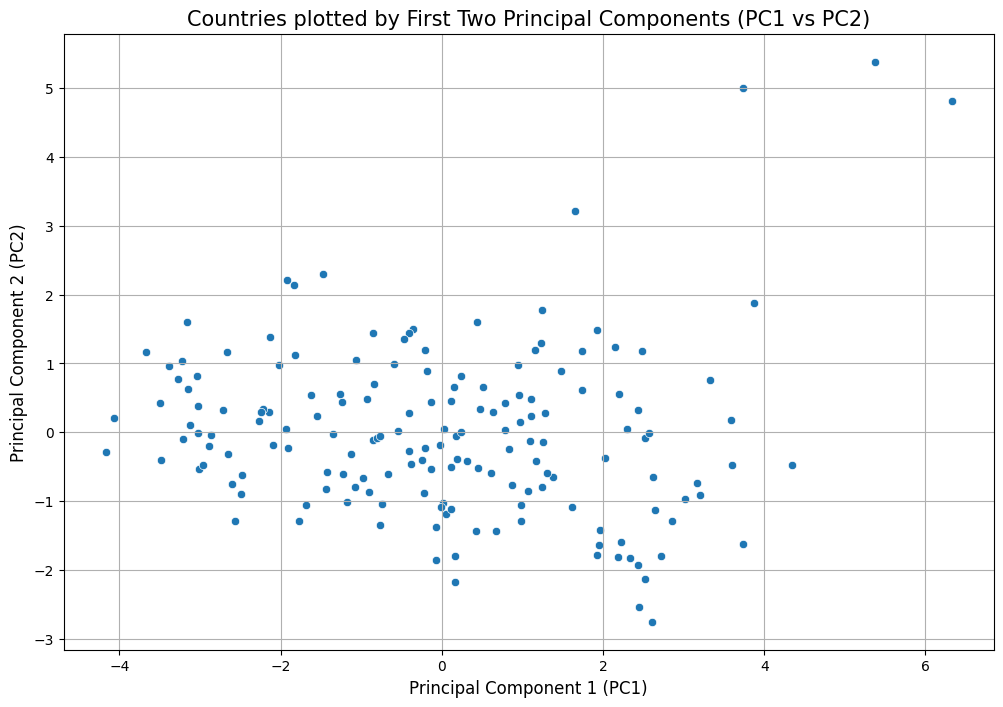

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Countries plotted by First Two Principal Components (PC1 vs PC2)', fontsize=15)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.grid(True)
plt.show()

The scatter plot above shows each country as a point in the 2D space formed by the first two principal components. 
- PC1 and PC2 capture a certain percentage of the total variance in the original 9-dimensional data. The exact amount is shown by the `explained_variance_ratio_`.
- Countries that are close together in this plot are more similar to each other based on the combined information captured by PC1 and PC2 from the original set of features.
- Clusters or groups of points in this plot might indicate natural groupings of countries with similar socio-economic and health profiles.
- Outliers in this plot represent countries that are significantly different from others along these principal components.

This 2D representation will be very useful later for visualizing the clusters formed by K-Means and Hierarchical clustering. The `df_pca` DataFrame is saved for this purpose.

---



<a id="kmeans-clustering"></a>
### 4. K-Means Clustering: Optimal K, Implementation, and Visualization

K-Means is a popular partitioning clustering algorithm that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid).

This section will cover:
1.  Determining the optimal number of clusters (K) using the Elbow Method and Silhouette Score.
2.  Implementing K-Means with the chosen K.
3.  Visualizing the clusters on the 2D PCA plot.

#### 4.1 Determining the Optimal Number of Clusters (K)

To choose an appropriate value for K, we will use two common methods:
*   **Elbow Method:** This method looks at the percentage of variance explained as a function of the number of clusters. We plot the Sum of Squared Distances (SSD) or inertia against the number of clusters. The "elbow" point on the plot, where the rate of decrease sharply changes, suggests a good value for K.
*   **Silhouette Score:** This method measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

##### 4.1.1 Elbow Method

K=1, Inertia=1503.0
K=2, Inertia=1035.1605338461984
K=3, Inertia=801.6506863986017
K=4, Inertia=720.5709447272295
K=5, Inertia=664.5923337440554
K=6, Inertia=644.3785485774507
K=7, Inertia=532.0166747610264
K=8, Inertia=480.0124418734426
K=9, Inertia=431.4588665561795
K=10, Inertia=404.06196387874894


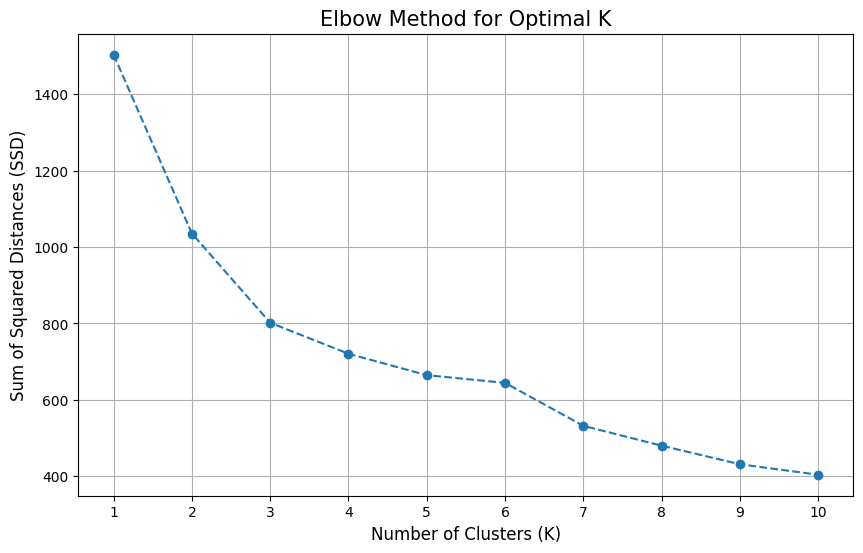

In [16]:
from sklearn.cluster import KMeans

# Calculate Sum of Squared Distances or inertia for a range of K values
ssd = []
K_range = range(1, 11) # Test K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled_features) # Use scaled features for K-Means
    print(f"K={k}, Inertia={kmeans.inertia_}")  # Print inertia for each K
    ssd.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, ssd, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Sum of Squared Distances (SSD)', fontsize=12)
plt.xticks(K_range)
plt.grid(True)
plt.show()

Looking for a point where the SSD starts to decrease more slowly, forming an "elbow". This point is often considered a good indicator of the optimal K.
From the graph above, the "elbow" point seems to be around K=3 or K=4, where the rate of decrease in SSD (inertia) starts to diminish.

The drop from K=2 to K=3 is 1035.16 - 801.65 = 233.51.
The drop from K=3 to K=4 is 801.65 - 720.57 = 81.08.
The drop from K=4 to K=5 is 720.57 - 664.59 = 55.98.

There is a significant change in the rate of decrease after K=3. While K=2 also shows a large drop from K=1, K=3 is where the "elbow" bend is more apparent before the curve flattens out more considerably.

##### 4.1.2 Silhouette Score

The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to +1.
- A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the object is probably assigned to the wrong cluster.

For K=2, Silhouette Score: 0.2705
For K=3, Silhouette Score: 0.2785
For K=4, Silhouette Score: 0.2432
For K=5, Silhouette Score: 0.2142
For K=6, Silhouette Score: 0.2014
For K=7, Silhouette Score: 0.2254
For K=8, Silhouette Score: 0.2043
For K=9, Silhouette Score: 0.2223
For K=10, Silhouette Score: 0.2160


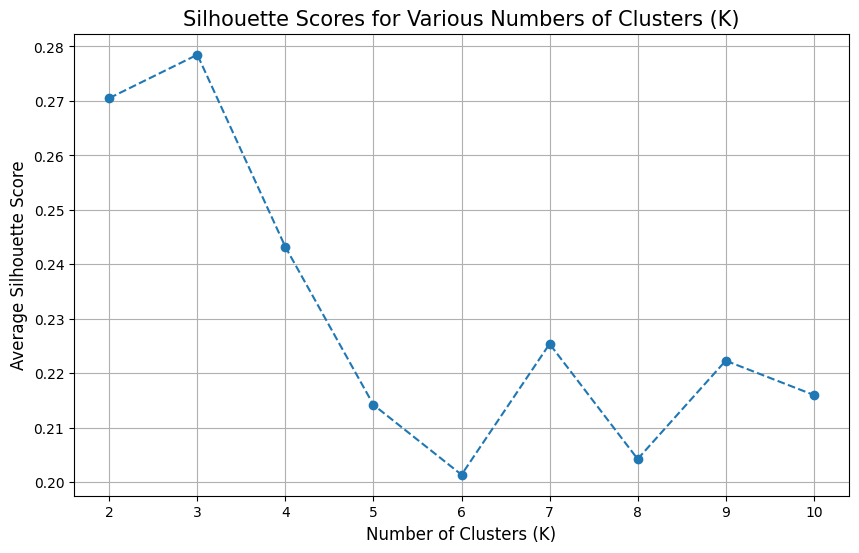

In [17]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range_silhouette = range(2, 11) # Silhouette score is not defined for K=1

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled_features)
    silhouette_avg = silhouette_score(df_scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For K={k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Various Numbers of Clusters (K)', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Average Silhouette Score', fontsize=12)
plt.xticks(K_range_silhouette)
plt.grid(True)
plt.show()

The highest average Silhouette Score is **0.2785 for K=3**. This suggests that, according to this metric, 3 clusters provide the best balance of cohesion within clusters and separation between clusters for this dataset using K-Means. While this score is not extremely high (closer to 1 would be ideal), it is the maximum among the tested K values, indicating K=3 is a reasonable choice based on this criterion.

##### 4.1.3 Davies-Bouldin Index

The Davies-Bouldin Index is another metric for evaluating clustering algorithms. It is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

A lower Davies-Bouldin Index relates to a model with better separation between the clusters. The optimal K is often chosen at the point where the Davies-Bouldin Index is minimized.

For K=2, Davies-Bouldin Score: 1.3598
For K=3, Davies-Bouldin Score: 1.2867
For K=4, Davies-Bouldin Score: 1.3744
For K=5, Davies-Bouldin Score: 1.4693
For K=6, Davies-Bouldin Score: 1.4088
For K=7, Davies-Bouldin Score: 1.2842
For K=8, Davies-Bouldin Score: 1.3481
For K=9, Davies-Bouldin Score: 1.2693
For K=10, Davies-Bouldin Score: 1.2681


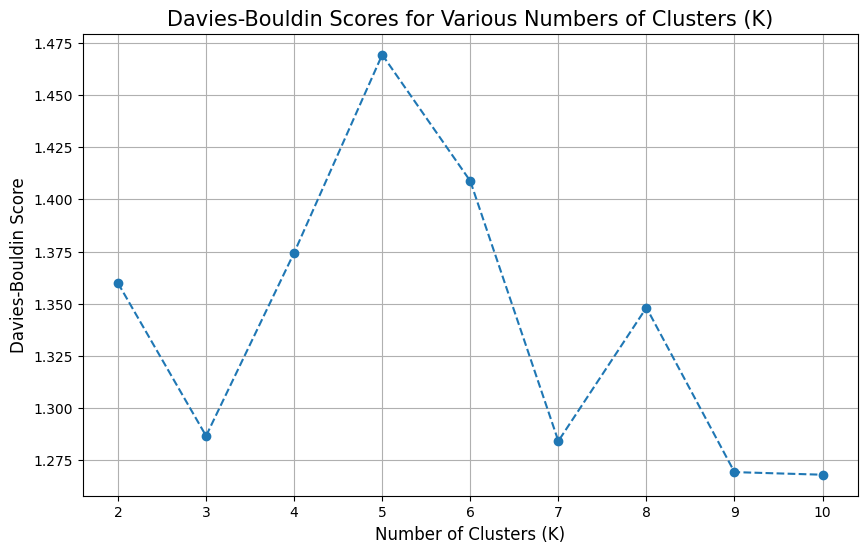

In [18]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
K_range_db = range(2, 11) # Davies-Bouldin score is not defined for K=1

for k in K_range_db:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled_features)
    db_score = davies_bouldin_score(df_scaled_features, cluster_labels)
    db_scores.append(db_score)
    print(f"For K={k}, Davies-Bouldin Score: {db_score:.4f}")

# Plot Davies-Bouldin Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range_db, db_scores, marker='o', linestyle='--')
plt.title('Davies-Bouldin Scores for Various Numbers of Clusters (K)', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Davies-Bouldin Score', fontsize=12)
plt.xticks(K_range_db)
plt.grid(True)
plt.show()

The lowest Davies-Bouldin scores are for K=10 (1.2218) and K=9 (1.2296), followed by K=7 (1.2631). K=3 has a score of 1.2867, which is competitive and relatively low.

**Consolidated Choice for K:**
- **Elbow Method:** Suggests K=3 or K=4.
- **Silhouette Score:** Highest for K=3 (0.2785).
- **Davies-Bouldin Index:** Lowest for K=10, K=9, K=7. K=3 is also relatively low 

Considering that the Elbow Method and Silhouette Score both strongly point to K=3, and the Davies-Bouldin score for K=3 is reasonably good (lower is better), **K=3 appears to be the most robust choice for the number of clusters.** This choice balances the within-cluster sum of squares, cluster cohesion/separation, and inter-cluster similarity. It also aligns with a common-sense expectation of segmenting countries into a few broad development categories (e.g., low, medium, high).

I arrived at these results after attempting different initializations ('random' and 'k-means++'; 'k-means++' was better) and after trying to determine the best K in scenarios both without and with outlier capping. Before capping, the metrics struggled to provide consistent K-values. After capping, K=3 emerged as a more consistent choice across the different evaluation metrics.

---


#### 4.2 K-Means Implementation with Chosen K

Now we will apply K-Means clustering using our chosen value of K.

In [19]:
# Choose the optimal K based on analysis
optimal_k = 3 

kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels_final = kmeans_final.fit_predict(df_scaled_features)

# Add cluster labels to the original DataFrame and the PCA DataFrame
df_countries['KMeans_Cluster'] = cluster_labels_final
df_pca['KMeans_Cluster'] = cluster_labels_final

print(f"Number of countries in each cluster (K={optimal_k}):")
# To sort by cluster ID (0, 1, 2...): print(df_countries['KMeans_Cluster'].value_counts().sort_index())
# To sort by number of countries (largest cluster first): print(df_countries['KMeans_Cluster'].value_counts())
print(df_countries['KMeans_Cluster'].value_counts().sort_index()) # Defaulting to sort by index for now

print("\nFirst 5 rows of df_pca with K-Means cluster labels:")
df_pca.head()

Number of countries in each cluster (K=3):
KMeans_Cluster
0    83
1    37
2    47
Name: count, dtype: int64

First 5 rows of df_pca with K-Means cluster labels:


,PC1,PC2,country,KMeans_Cluster
0,-3.025658,-0.003637,Afghanistan,2
1,0.452028,-0.513954,Albania,0
2,-0.375785,-0.464859,Algeria,0
3,-3.166567,1.602272,Angola,2
4,1.107019,0.231739,Antigua and Barbuda,0


In [20]:
# show countries in each cluster
print("\nCountries in Cluster 0:")
print(df_countries[df_countries['KMeans_Cluster'] == 0]['country'].tolist())
print("\nCountries in Cluster 1:")
print(df_countries[df_countries['KMeans_Cluster'] == 1]['country'].tolist())
print("\nCountries in Cluster 2:") 
print(df_countries[df_countries['KMeans_Cluster'] == 2]['country'].tolist())




Countries in Cluster 0:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand', 'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukr

In [21]:
# rename cluster labels to the need of attention from organization
df_countries['KMeans_Cluster'] = df_countries['KMeans_Cluster'].map({
    1: 'High Development',
    0: 'Medium Development',
    2: 'Low Development'
})

#### 4.3 Visualization of Clusters on PCA Plot

Let's visualize the clusters on the 2D scatter plot of the first two principal components.

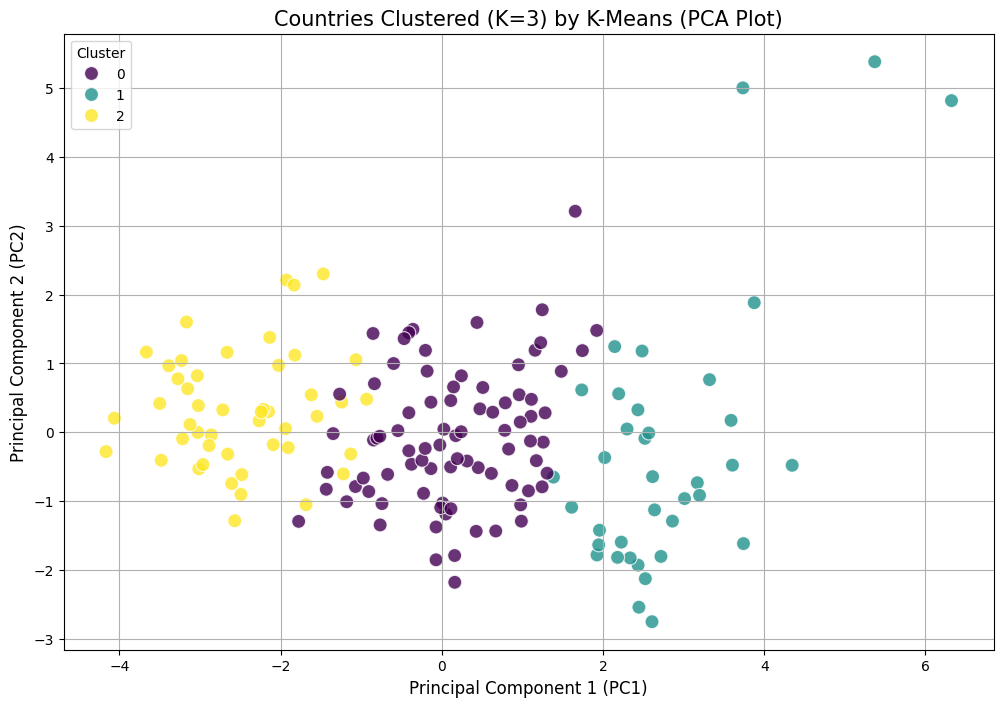

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=df_pca, palette='viridis', s=100, alpha=0.8)
plt.title(f'Countries Clustered (K={optimal_k}) by K-Means (PCA Plot)', fontsize=15)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


The plot above shows the countries colored by their assigned K-Means cluster. 
- This visualization helps to see how well K-Means has separated the countries in the reduced 2D space.
- We can observe the general characteristics of the clusters based on their position in the PCA plot. For example, clusters align along PC1 or PC2, which themselves are combinations of the original features.
- The separation between clusters and the density of points within each cluster can give a visual indication of clustering quality.


#### 4.4 Geo-visualization of K-Means Clusters

To better understand the geographical distribution of these K-Means clusters, we can plot them on a world map. This helps us see if there are any regional patterns in the clustering results.

In [23]:

df_countries['KMeans_Cluster_Cat'] = df_countries['KMeans_Cluster'].astype(str)

fig_kmeans_map = px.choropleth(
    df_countries,
    locations="country",
    locationmode="country names",
    color="KMeans_Cluster_Cat",  # Color by K-Means cluster label
    hover_name="country",
    hover_data={'KMeans_Cluster': True}, # Show cluster number on hover
    title=f"Geographical Distribution of K-Means Clusters (K={optimal_k})",
    height=600
)
fig_kmeans_map.show()



This map displays the countries colored according to their assigned K-Means cluster.
- It allows for a visual assessment of whether the identified clusters have a geographical coherence
- This can provide insights into regional similarities or disparities in terms of socio-economic and health factors.
- Comparing this map with the earlier map of `gdpp` shows that clusters group countries based on their development status.
---

<a id="hierarchical-clustering"></a>
### 5. Hierarchical Clustering

Hierarchical clustering is an alternative approach that builds a hierarchy of clusters. There are two main types: agglomerative (bottom-up) and divisive (top-down). We will use agglomerative clustering.

This section will cover:
1.  Generating a dendrogram to visualize the cluster hierarchy and help determine the number of clusters.
2.  Implementing Agglomerative Clustering with a chosen number of clusters.
3.  Visualizing the clusters on the 2D PCA plot and a geo-map.

#### 5.1 Dendrogram for Optimal Cluster Number

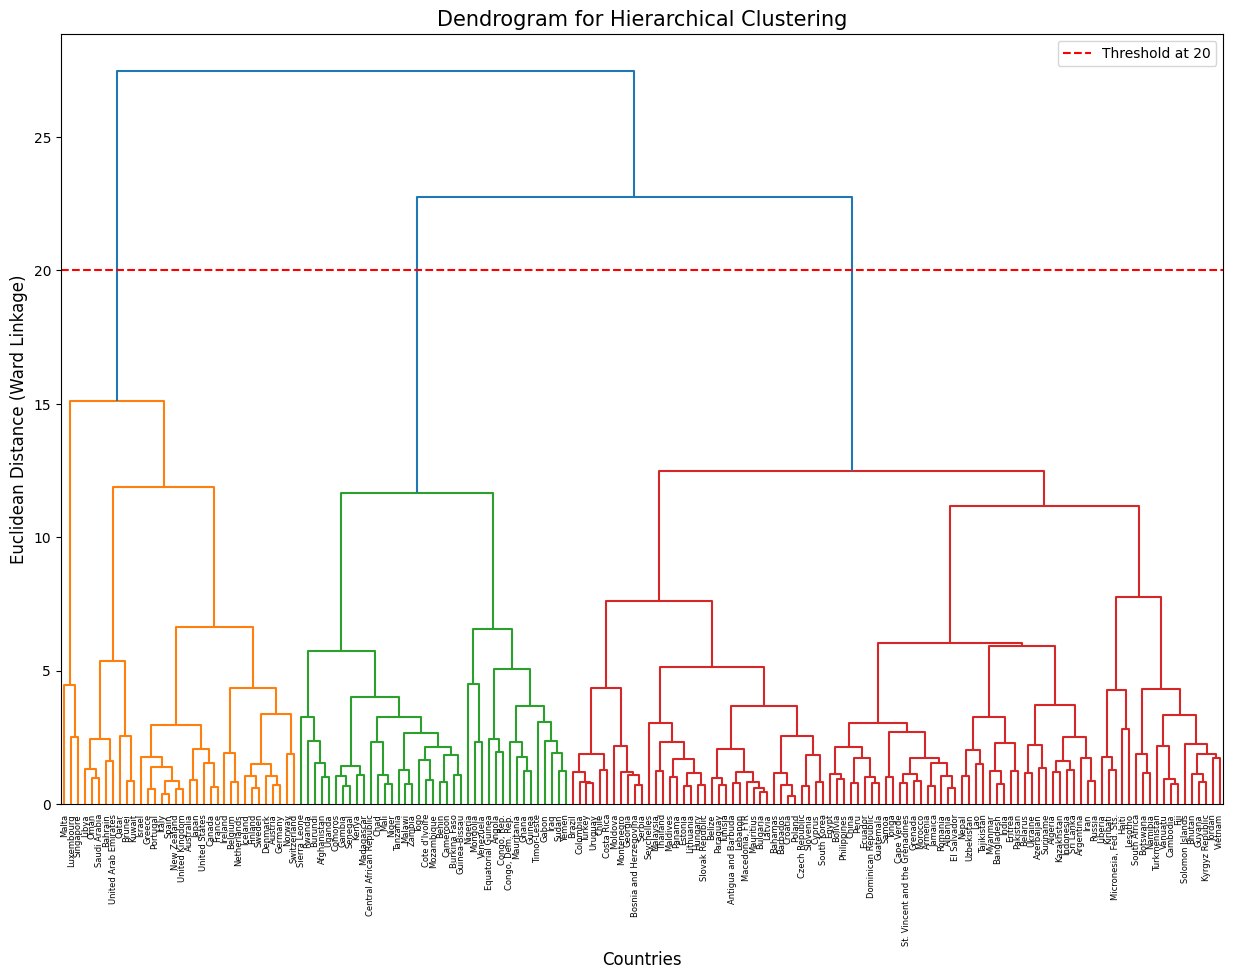

In [24]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))
plt.title("Dendrogram for Hierarchical Clustering", fontsize=15)

# Using 'ward' linkage method as it tends to find more spherical clusters
dend = shc.dendrogram(shc.linkage(df_scaled_features, method='ward'),
                      labels=country_names, # Use country names as labels
                      leaf_rotation=90,  
                      leaf_font_size=6) # Adjust font size
plt.xlabel("Countries", fontsize=12)
plt.ylabel("Euclidean Distance (Ward Linkage)", fontsize=12)
plt.axhline(y=20, color='r', linestyle='--', label='Threshold at 20')
plt.legend()
plt.show()

*   The dendrogram visualizes the Hierarchical clustering process, showing how countries (leaves) are progressively merged into larger clusters based on their similarity. The y-axis (height of the merge) represents the distance at which these merges occur.
*   To determine the optimal number of clusters, we look for a point to "cut" the dendrogram horizontally. A common approach is to find a cut that crosses the longest vertical lines (representing significant distances between potential cluster merges). In this case, a horizontal cut at a Euclidean distance of approximately 20 intersects three main branches, suggesting that 3 is a suitable number of clusters. This aligns with the aim of comparing with K-Means results and often corresponds to a point where further merging would combine relatively dissimilar groups.


#### 5.2 Hierarchical Clustering Implementation

In [25]:
from sklearn.cluster import AgglomerativeClustering

# Number of clusters chosen from dendrogram analysis (e.g., 3)
hierarchical_n_clusters = 3

agglomerative_cluster = AgglomerativeClustering(n_clusters=hierarchical_n_clusters, linkage='ward', metric='euclidean')
hierarchical_labels = agglomerative_cluster.fit_predict(df_scaled_features)

# Add hierarchical cluster labels to the original DataFrame and the PCA DataFrame
df_countries['Hierarchical_Cluster'] = hierarchical_labels
df_pca['Hierarchical_Cluster'] = hierarchical_labels

print(f"Number of countries in each hierarchical cluster (n={hierarchical_n_clusters}):")
print(df_countries['Hierarchical_Cluster'].value_counts().sort_index())

print("\nFirst 5 rows of df_pca with Hierarchical cluster labels:")
df_pca.head()

Number of countries in each hierarchical cluster (n=3):
Hierarchical_Cluster
0    34
1    94
2    39
Name: count, dtype: int64

First 5 rows of df_pca with Hierarchical cluster labels:


,PC1,PC2,country,KMeans_Cluster,Hierarchical_Cluster
0,-3.025658,-0.003637,Afghanistan,2,2
1,0.452028,-0.513954,Albania,0,1
2,-0.375785,-0.464859,Algeria,0,1
3,-3.166567,1.602272,Angola,2,2
4,1.107019,0.231739,Antigua and Barbuda,0,1


#### 5.3 Visualization of Hierarchical Clusters on PCA Plot

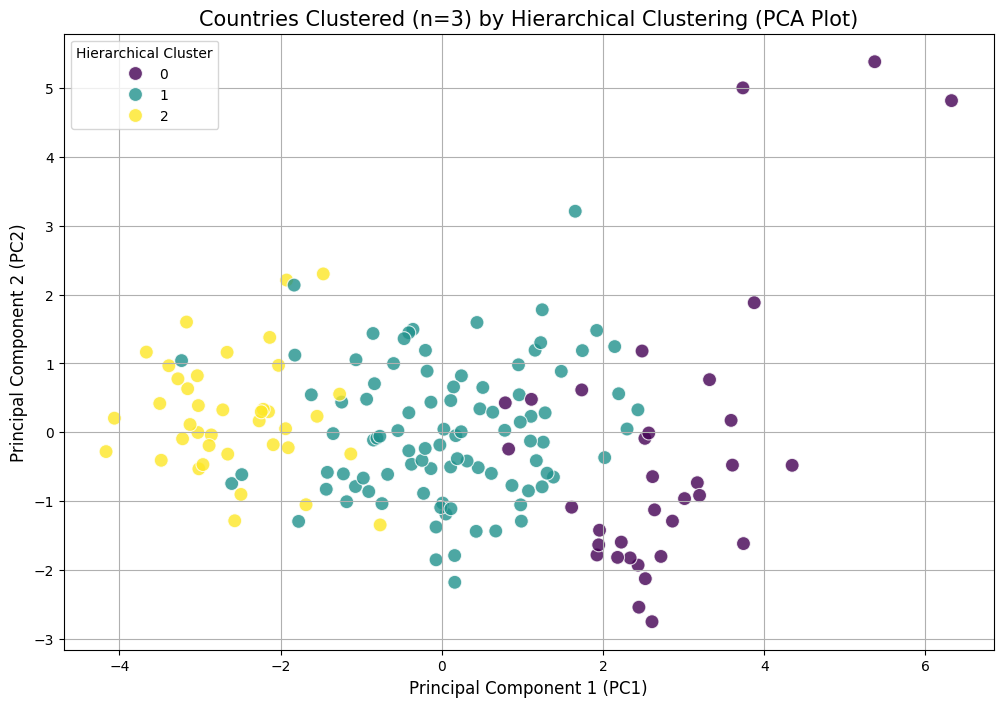

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=df_pca, palette='viridis', s=100, alpha=0.8)
plt.title(f'Countries Clustered (n={hierarchical_n_clusters}) by Hierarchical Clustering (PCA Plot)', fontsize=15)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Hierarchical Cluster')
plt.grid(True)
plt.show()

#### 5.4 Geo-visualization of Hierarchical Clusters

In [27]:

# Convert Hierarchical_Cluster labels to string for categorical coloring in Plotly
df_countries['Hierarchical_Cluster_Cat'] = df_countries['Hierarchical_Cluster'].astype(str)

fig_hierarchical_map = px.choropleth(
    df_countries,
    locations="country",
    locationmode="country names",
    color="Hierarchical_Cluster_Cat", # Color by Hierarchical cluster label
    hover_name="country",
    hover_data={'Hierarchical_Cluster': True}, # Show cluster number on hover
    
    title=f"Geographical Distribution of Hierarchical Clusters (n={hierarchical_n_clusters})",
    height=600
)
fig_hierarchical_map.show()



Notably, while using the same number of clusters (3) as K-Means, hierarchical clustering appeared to struggle more in forming clearly distinct and interpretable groupings compared to K-Means in this specific analysis. This can sometimes occur if the underlying data structure doesn't perfectly fit a hierarchical model. Using other linkage methods showed even worse results.

---

<a id="evaluation"></a>
### 6. Cluster Evaluation, and Interpretation

In this section, we will:
1.  **Profile the Clusters:** Analyze the characteristics of the clusters formed by K-Means (using the mapped 'Low', 'Medium', 'High' Development labels)
2.  **Identify Target Countries:** Based on the profiles, particularly from the K-Means 'Low Development' cluster, identify countries that are most in need of aid.

#### 6.1 K-Means Cluster Profiling

We will group the `df_countries` DataFrame by the `KMeans_Cluster` labels (which are 'Low Development', 'Medium Development', 'High Development') and calculate the mean of the numerical features for each cluster. This will help us understand the typical profile of countries in each development category.

K-Means Cluster Profiles (Mean Values):
                    child_mort    exports    health    imports        income  \
KMeans_Cluster                                                                 
High Development      5.237838  58.097297  8.782973  51.281081  45056.756757   
Low Development      92.961702  29.151277  6.388511  42.323404   3942.404255   
Medium Development   22.025301  40.307096  6.180602  47.518866  12177.951807   

                    inflation  life_expec  total_fer          gdpp  
KMeans_Cluster                                                      
High Development     2.588432   79.956757   1.755676  42102.702703  
Low Development     12.019681   59.187234   5.008085   1922.382979  
Medium Development   7.697217   72.802410   2.312892   6227.253012  


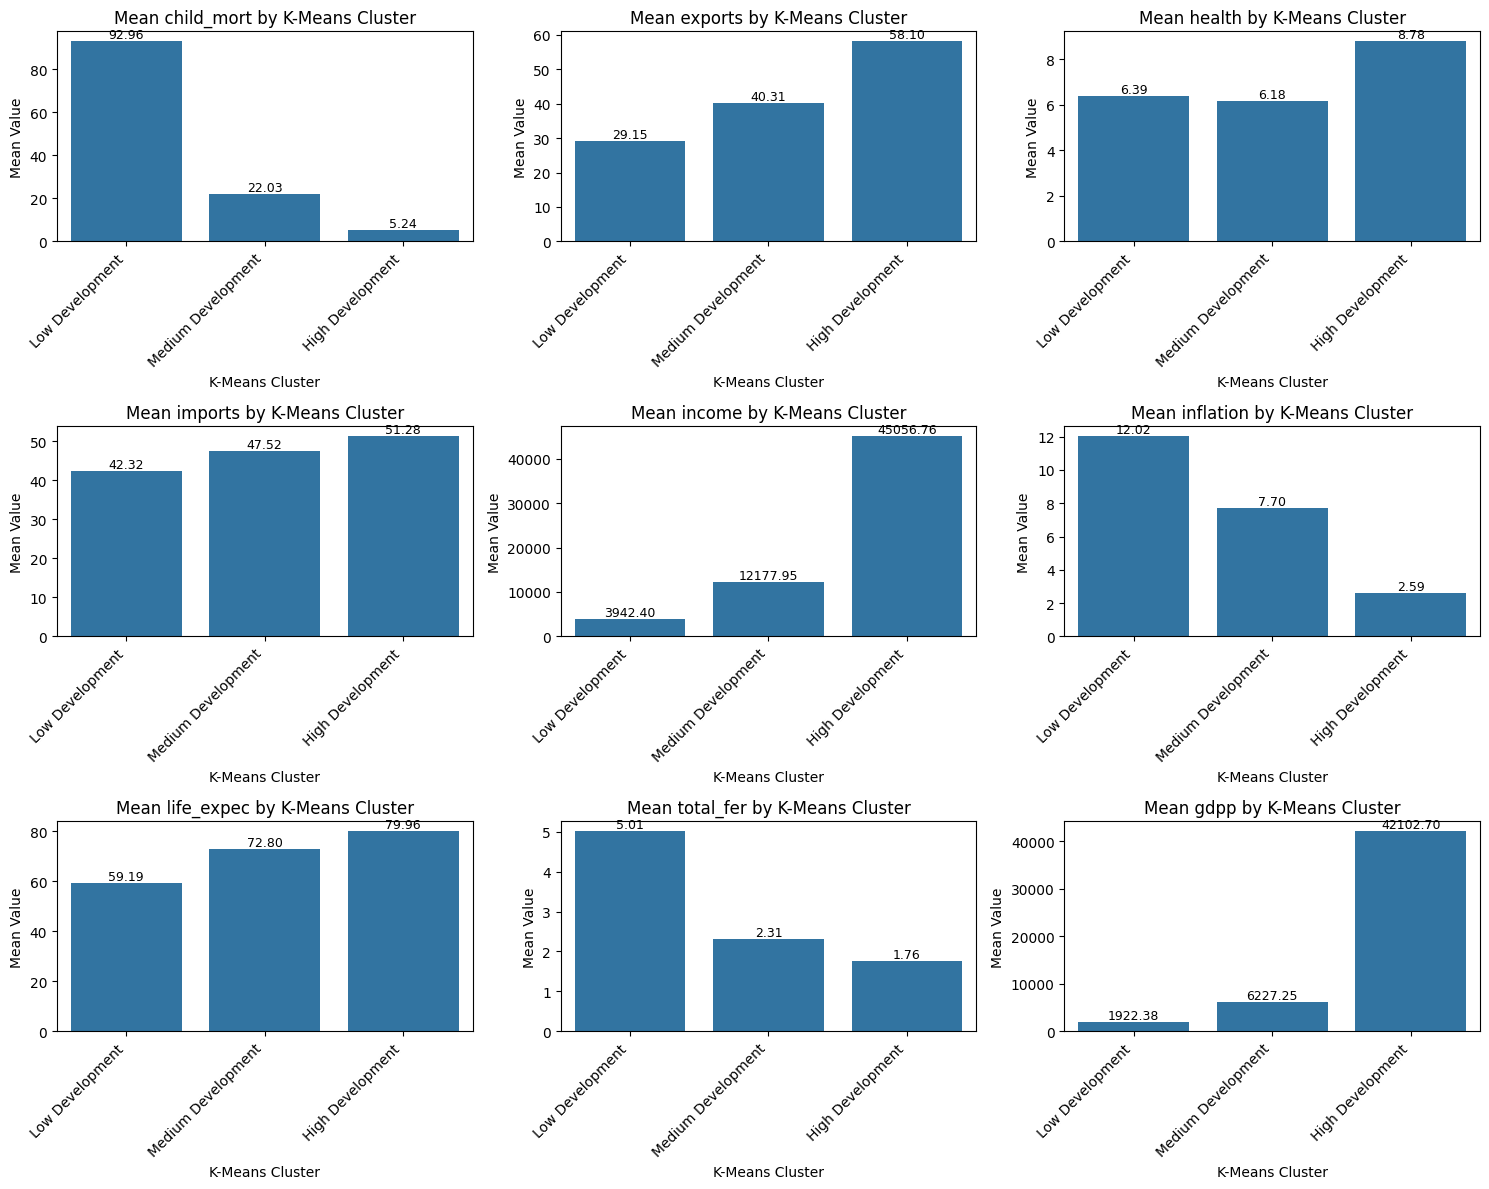

In [28]:
kmeans_profile_indexed = df_countries.groupby('KMeans_Cluster')[numerical_features].mean()

print("K-Means Cluster Profiles (Mean Values):")
print(kmeans_profile_indexed)



# Visualize K-Means profiles, one plot per feature
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols # Calculate rows needed

plt.figure(figsize=(15, n_rows * 4)) # Adjust figure size based on number of rows

for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    # Get the mean values for the current feature across clusters
    feature_means = kmeans_profile_indexed[feature].sort_index() # Sort by index to ensure consistent order
    
    # Create bar plot
    bars = sns.barplot(x=feature_means.index, y=feature_means.values, order=['Low Development', 'Medium Development', 'High Development'])

    plt.title(f'Mean {feature} by K-Means Cluster', fontsize=12)
    plt.ylabel('Mean Value', fontsize=10)
    plt.xlabel('K-Means Cluster', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    
    # Add text labels on bars
    for bar in bars.patches:
        plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height(),
                 f'{bar.get_height():.2f}',
                 ha='center',
                 va='bottom',
                 fontsize=9)

plt.tight_layout()
plt.show()




**Interpretation of K-Means Cluster Profiles:**

By examining the mean values of the features for each K-Means cluster (Low, Medium, High Development) and comparing them to the overall average, we can characterize each group:

*   **Low Development Cluster:**
    *   Expected to have high `child_mort` and `total_fer`.
    *   Expected to have low `income`, `gdpp`, `life_expec`, `exports`, and `health` spending.
    *   `inflation` might be high or variable.
    *   These are the countries most in need of aid.

*   **Medium Development Cluster:**
    *   Features are expected to be around the overall average or in between the Low and High Development clusters.
    *   These countries are developing but may still face significant challenges.

*   **High Development Cluster:**
    *   Expected to have low `child_mort` and `total_fer`.
    *   Expected to have high `income`, `gdpp`, `life_expec`, `exports`, and `health` spending.
    *   `inflation` is generally expected to be lower and more stable.
    *   These are the most developed countries, least in need of aid.

The bar plot visually confirms these characteristics, showing how each cluster deviates from the average for each indicator. This profiling is crucial for validating the clusters and for the subsequent step of making recommendations.

#### 6.2 Identification of Target Countries for Aid

Based on the cluster profiles, the countries identified in the "Low Development" cluster are the primary candidates for development aid, especially for child support initiatives. These countries typically exhibit:
- High child mortality rates.
- Low income per person.
- Low GDP per capita.
- Low life expectancy.
- High total fertility rates.

We can list the countries in these clusters. For consistency and actionability, we might prioritize countries that are identified as "Low Development" , if such a consensus exists for a significant number of them, or choose one algorithm's result based on which provides more interpretable or actionable clusters.

Let's list the countries in the "Low Development" K-Means cluster as an example.

In [29]:
# Identify countries in the 'Low Development' K-Means cluster
low_development_kmeans_countries = df_countries[df_countries['KMeans_Cluster'] == 'Low Development']['country'].tolist()

print(f"Number of countries in K-Means 'Low Development' cluster: {len(low_development_kmeans_countries)}")
print("\\nCountries in K-Means 'Low Development' cluster:")
for country in low_development_kmeans_countries:
    print(country)


Number of countries in K-Means 'Low Development' cluster: 47
\nCountries in K-Means 'Low Development' cluster:
Afghanistan
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Equatorial Guinea
Eritrea
Gabon
Gambia
Ghana
Guinea
Guinea-Bissau
Haiti
Iraq
Kenya
Kiribati
Lao
Lesotho
Liberia
Madagascar
Malawi
Mali
Mauritania
Mozambique
Namibia
Niger
Nigeria
Pakistan
Rwanda
Senegal
Sierra Leone
South Africa
Sudan
Tanzania
Timor-Leste
Togo
Uganda
Yemen
Zambia


These lists provide a clear set of target countries for aid organizations. Further investigation into the specific contexts of these countries would be the next step for effective aid deployment.

In [30]:
# Filter for 'Low Development' countries
low_development_df = df_countries[df_countries['KMeans_Cluster'] == 'Low Development'].copy()

# For visualization, we can assign a single category to all these countries
# or use a specific column if we want to color them by another metric.
# Here, we'll just confirm they are 'Low Development'.
low_development_df['Development_Status'] = 'Low Development'

fig_low_dev_map = px.choropleth(
    low_development_df,
    locations="country",
    locationmode="country names",
    color="Development_Status", # This will give all countries the same color
    hover_name="country",
    hover_data={'KMeans_Cluster': True, 'child_mort': True, 'income': True, 'gdpp': True}, # Show relevant data on hover
    title="Geographical Distribution of 'Low Development' K-Means Cluster Countries",
    height=600,
    color_discrete_map={'Low Development': 'red'} # Assign a specific color
)
fig_low_dev_map.show()

### Conclusion

This project successfully segmented 167 countries based on key socio-economic and health indicators to identify nations most in need of development aid. The primary methodology involved unsupervised machine learning, specifically K-Means and Hierarchical clustering.
3.  **Clustering Algorithms:**
    *   **K-Means Clustering:** This partitioning method was applied to the scaled features. The optimal number of clusters (K) was determined using a combination of the Elbow Method (analyzing inertia for K=1 to 10), Silhouette Scores (evaluating cohesion and separation for K=2 to 10), and the Davies-Bouldin Index (measuring cluster similarity for K=2 to 10). These analyses consistently pointed towards an **optimal K of 3 clusters**.
    *   **Hierarchical Clustering:** Agglomerative hierarchical clustering (using the 'ward' linkage method) was also performed on the scaled features. A dendrogram was generated to visualize the merging process and further supported the choice of three clusters for a comparative analysis.

**Key Findings from Clustering:**
The K-Means algorithm, with K=3, effectively grouped countries into 'Low Development', 'Medium Development', and 'High Development' categories. The 'Low Development' cluster, comprising 47 countries, is characterized by high child mortality, high total fertility rates, low income per capita, low GDP per capita, and lower life expectancy. These findings align with expectations and highlight the countries facing the most significant developmental challenges.

The 'Medium Development' cluster (83 countries) and 'High Development' cluster (37 countries) showed progressively better socio-economic and health profiles, validating the clustering approach.
